In [2]:
# Task - 1 Understand the DataSet

import pandas as pd

# Load dataset
df = pd.read_csv("/content/sample_data/Telco_Customer_Churn_Dataset  (3).csv")

# Display first 10 rows
print(df.head(10))

# Check data types
print(df.dtypes)

# Check for missing values
print(df.isnull().sum())


   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   
5  9305-CDSKC  Female              0      No         No       8          Yes   
6  1452-KIOVK    Male              0      No        Yes      22          Yes   
7  6713-OKOMC  Female              0      No         No      10           No   
8  7892-POOKP  Female              0     Yes         No      28          Yes   
9  6388-TABGU    Male              0      No        Yes      62          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL        

In [3]:
# Tasks 2 - Data Cleaning ( Ensure the dataset is clean for analysis.)

num_cols = df.select_dtypes(include='number').columns
cat_cols = df.select_dtypes(include='object').columns

for col in num_cols:
    df[col].fillna(df[col].median(), inplace=True)

for col in cat_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)

# Remove duplicates
df.drop_duplicates(inplace=True)

# Standardize column names
df.columns = df.columns.str.lower().str.replace(' ', '_')

# Verify cleaning
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerid        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   seniorcitizen     7043 non-null   int64  
 3   partner           7043 non-null   object 
 4   dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   phoneservice      7043 non-null   object 
 7   multiplelines     7043 non-null   object 
 8   internetservice   7043 non-null   object 
 9   onlinesecurity    7043 non-null   object 
 10  onlinebackup      7043 non-null   object 
 11  deviceprotection  7043 non-null   object 
 12  techsupport       7043 non-null   object 
 13  streamingtv       7043 non-null   object 
 14  streamingmovies   7043 non-null   object 
 15  contract          7043 non-null   object 
 16  paperlessbilling  7043 non-null   object 


/tmp/ipython-input-2953244219.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)
/tmp/ipython-input-2953244219.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usi

       seniorcitizen       tenure  monthlycharges
count    7043.000000  7043.000000     7043.000000
mean        0.162147    32.371149       64.761692
std         0.368612    24.559481       30.090047
min         0.000000     0.000000       18.250000
25%         0.000000     9.000000       35.500000
50%         0.000000    29.000000       70.350000
75%         0.000000    55.000000       89.850000
max         1.000000    72.000000      118.750000
        customerid gender partner dependents phoneservice multiplelines  \
count         7043   7043    7043       7043         7043          7043   
unique        7043      2       2          2            2             3   
top     3186-AJIEK   Male      No         No          Yes            No   
freq             1   3555    3641       4933         6361          3390   

       internetservice onlinesecurity onlinebackup deviceprotection  \
count             7043           7043         7043             7043   
unique               3          

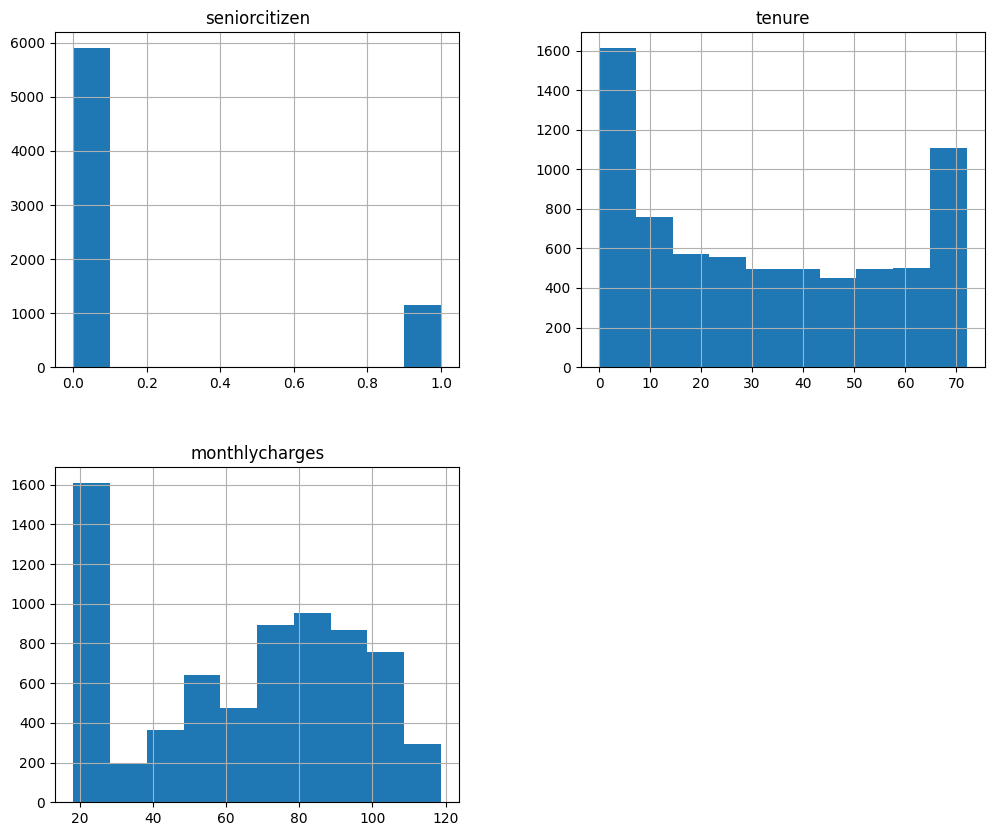

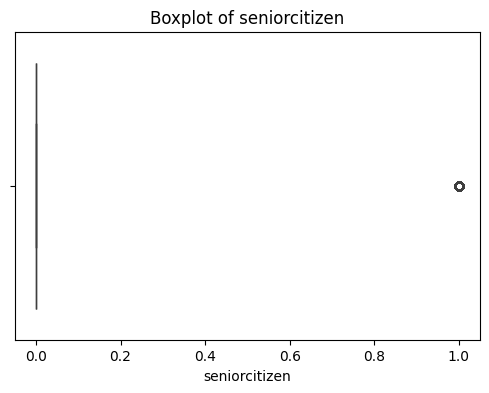

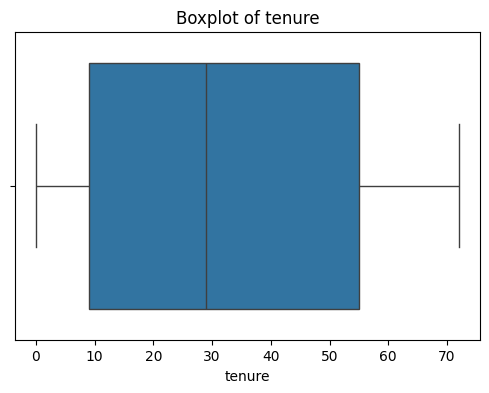

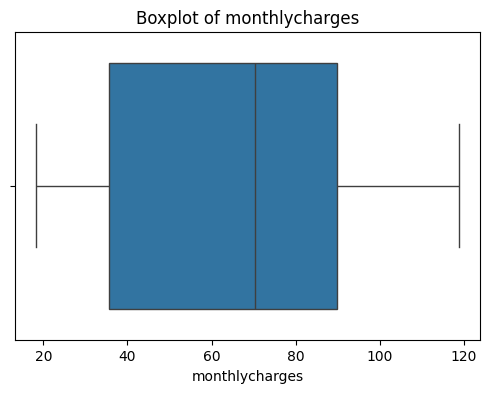

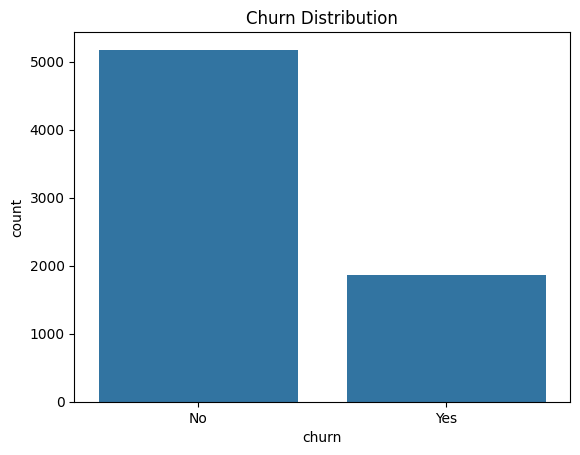

churn
No     73.463013
Yes    26.536987
Name: proportion, dtype: float64


In [13]:
# Tasks 3: Exploratory Data Analysis (EDA)

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

df.columns = df.columns.str.lower().str.replace(' ', '_')

if 'total_charges' in df.columns:
    df['total_charges'] = pd.to_numeric(df['total_charges'], errors='coerce')
    df.dropna(subset=['total_charges'], inplace=True)


# Summary statistics
print(df.describe())
print(df.describe(include='object'))  # For categorical

# Update num_cols with standardized names
num_cols = df.select_dtypes(include=['number', 'float64', 'int64']).columns

# Histograms for numerical columns
df[num_cols].hist(figsize=(12, 10))
plt.show()

# Box plots for numerical columns
for col in num_cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

# Churn distribution
if 'churn' in df.columns:
    sns.countplot(x='churn', data=df)
    plt.title('Churn Distribution')
    plt.show()

    # Churn rate proportions
    churn_rate = df['churn'].value_counts(normalize=True) * 100
    print(churn_rate)
else:
    print("\n'churn' column not found for churn analysis.")

In [33]:
# Tasks 4: Customer Segmentation Visualization

import plotly.express as px
import pandas as pd

# Define tenure categories
df['tenure_group'] = pd.cut(df['tenure'], bins=[0,12,36,df['tenure'].max()],
                            labels=['0-12 months', '13-36 months', '37+ months'])

# Pie chart for customer distribution
fig = px.pie(df, names='tenure_group', title='Customer Distribution by Tenure')
fig.show()

# Clustered bar chart for average monthly charges by tenure group
avg_charges = df.groupby('tenure_group')['monthlycharges'].mean().reset_index()
fig2 = px.bar(avg_charges, x='tenure_group', y='monthlycharges', text='monthlycharges',
              title='Average Monthly Charges by Tenure Group')
fig2.show()

/tmp/ipython-input-2826954285.py:15: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



/tmp/ipython-input-3671099846.py:7: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



   tenure_group monthlycharges                        churn
                          mean  median     max    min  mean
0   0-12 months      56.172023  56.150  112.95  18.75   0.0
1  13-36 months      63.248195  69.675  116.25  18.25   0.0
2    37+ months      72.008730  80.300  118.75  18.40   0.0

Churn Rate by gender:
gender
Female    0.0
Male      0.0
Name: churn, dtype: float64

Churn Rate by seniorcitizen:
seniorcitizen
0    0.0
1    0.0
Name: churn, dtype: float64

Churn Rate by paymentmethod:
paymentmethod
Bank transfer (automatic)    0.0
Credit card (automatic)      0.0
Electronic check             0.0
Mailed check                 0.0
Name: churn, dtype: float64

Churn Rate by contract:
contract
Month-to-month    0.0
One year          0.0
Two year          0.0
Name: churn, dtype: float64


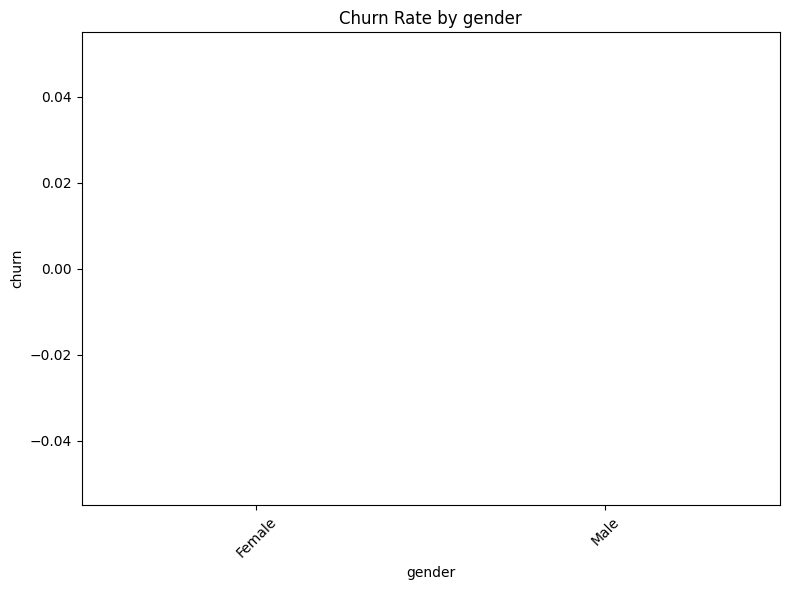

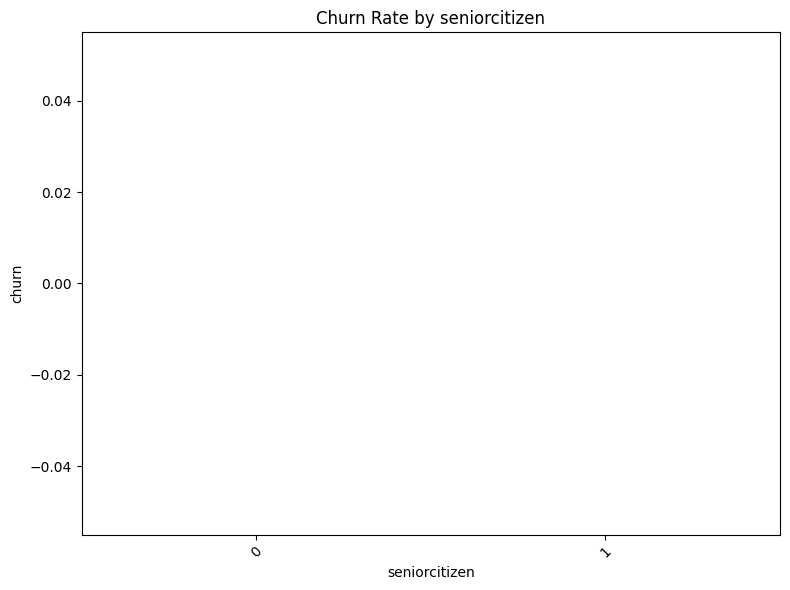

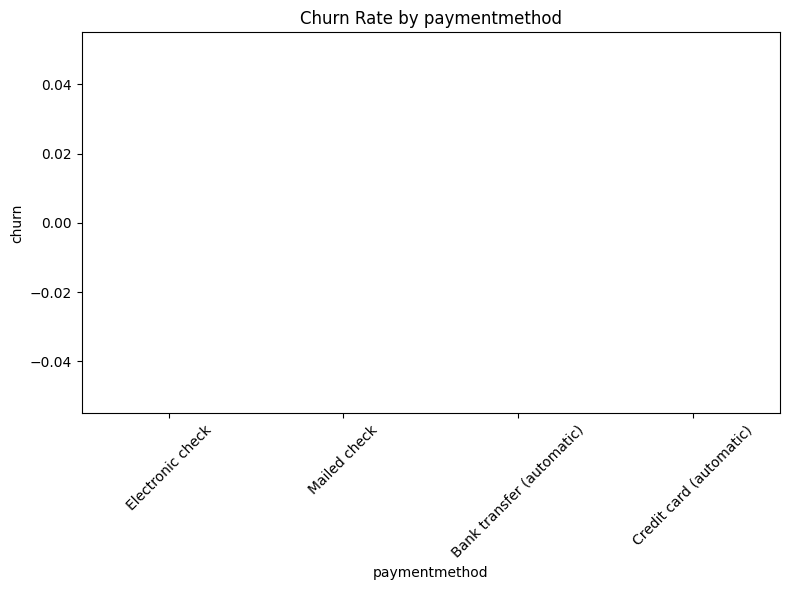

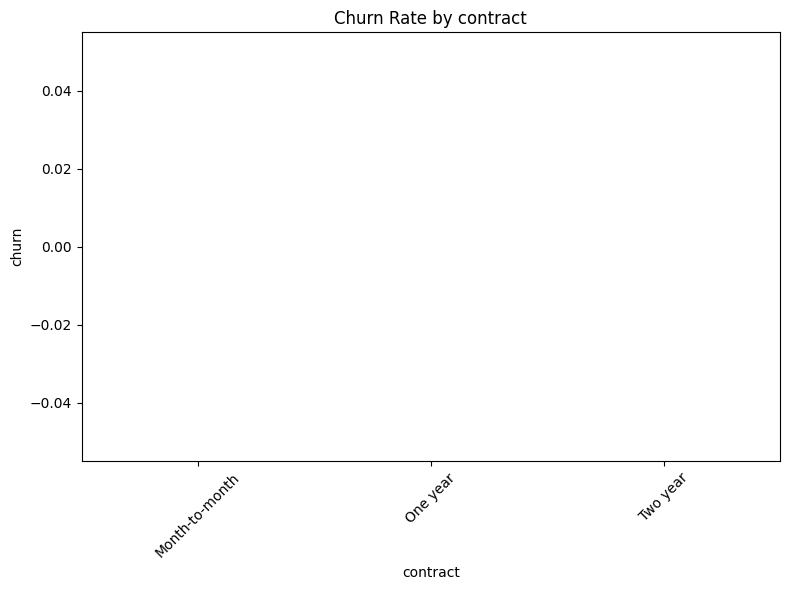

In [34]:
# Tasks 5 - Advanced Analysis

# Convert 'churn' to numeric
df['churn'] = df['churn'].apply(lambda x: 1 if x == 'Yes' else 0)

# Group by tenure group and compute stats
tenure_stats = df.groupby('tenure_group').agg({
    'monthlycharges': ['mean','median','max','min'],
    'churn': 'mean'
}).reset_index()
print(tenure_stats)

# Churn by demographics
demographics = ['gender','seniorcitizen','paymentmethod','contract']
for col in demographics:
    churn_demo = df.groupby(col)['churn'].mean().sort_values(ascending=False)
    print(f"\nChurn Rate by {col}:\n{churn_demo}")

# Optional: visualize churn by demographics
for col in demographics:
    plt.figure(figsize=(8, 6)) # Added figsize for better visualization
    sns.barplot(x=col, y='churn', data=df)
    plt.title(f'Churn Rate by {col}')
    plt.xticks(rotation=45)
    plt.tight_layout() # Added to prevent labels overlapping
    plt.show()